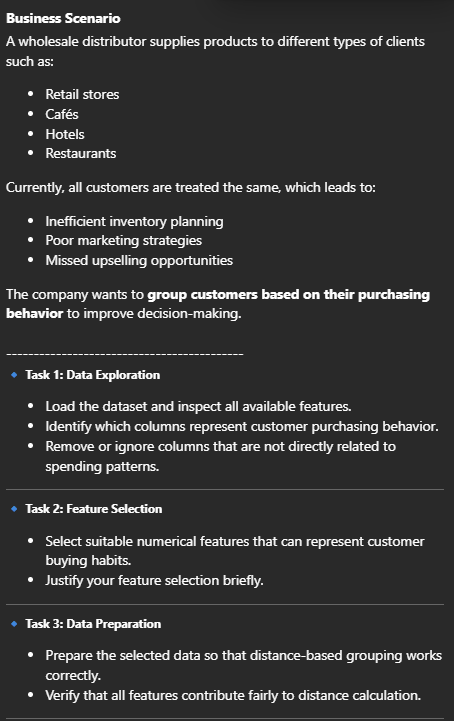

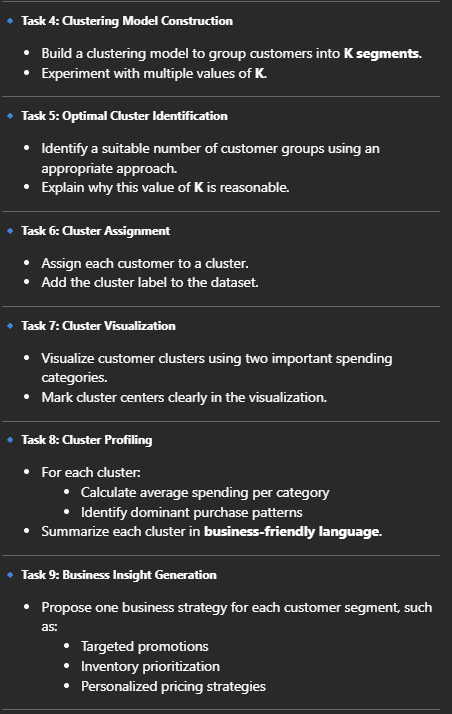

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/Wholesale customers data.csv"

df=pd.read_csv(file_path)
df.head(), df.shape, df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


(   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
 0        2       3  12669  9656     7561     214              2674        1338
 1        2       3   7057  9810     9568    1762              3293        1776
 2        2       3   6353  8808     7684    2405              3516        7844
 3        1       3  13265  1196     4221    6404               507        1788
 4        2       3  22615  5410     7198    3915              1777        5185,
 (440, 8),
 None)

In [7]:
# Task 2: Select purchasing behavior features only
X = df.drop(columns=["Channel", "Region"])
X.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
# Task 3: Scale data so all features contribute equally
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Task 4: Build KMeans models with different K values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


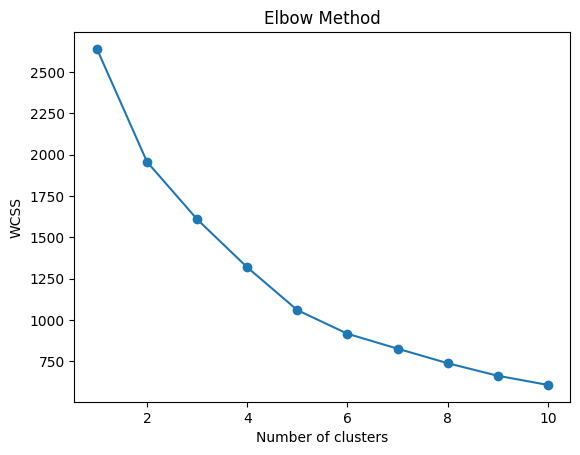

In [10]:
# Task 5: Elbow method to identify optimal K
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [11]:
# Task 6: Assign customers to clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


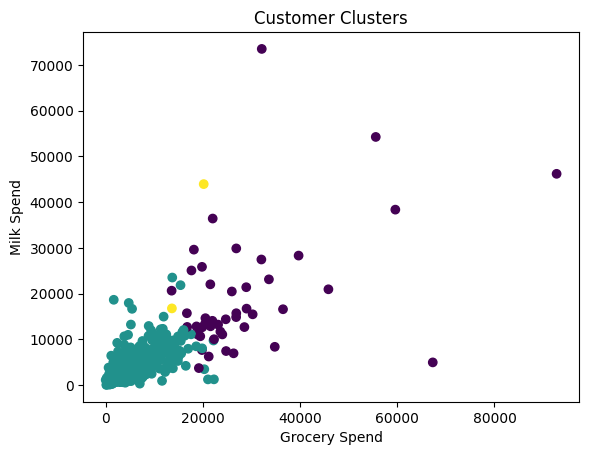

In [12]:
# Task 7: Visualize clusters using two key spending features
plt.scatter(df["Grocery"], df["Milk"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Grocery Spend")
plt.ylabel("Milk Spend")
plt.title("Customer Clusters")
plt.show()


In [13]:
# Task 8: Average spending per cluster
cluster_profile = df.groupby("Cluster").mean()
cluster_profile


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.977778,2.511111,10440.933333,19386.422222,28656.088889,2190.244444,13327.800000,2374.200000
1,1.249364,2.547074,12062.913486,4115.099237,5534.966921,2940.676845,1696.170483,1299.114504
2,1.000000,2.500000,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000


In [14]:
# Task 9: Business insights (textual analysis)
cluster_profile


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.977778,2.511111,10440.933333,19386.422222,28656.088889,2190.244444,13327.800000,2374.200000
1,1.249364,2.547074,12062.913486,4115.099237,5534.966921,2940.676845,1696.170483,1299.114504
2,1.000000,2.500000,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000


In [15]:
# Task 10: Stability check with different random state
kmeans_alt = KMeans(n_clusters=3, random_state=99, n_init=10)
df["Cluster_alt"] = kmeans_alt.fit_predict(X_scaled)

(df["Cluster"] == df["Cluster_alt"]).value_counts()


,count
False,439
True,1
